## <center> Оценка свободных параметров в модели Харриса с помощью метода максимального правдоподобия </center>

Пространственный профиль $B_l(z)$ описывается функцией $B_l(z) = B_0 \text{th}(z/L)$, где $B_0$ - параметр, показывающий значение магнитного поля, на которое выходит профиль, $z$ - текущая пространственная координата вдоль нормали к слою, $L$ - параметр, характеризующий полуширину слоя. Полученная аппроксимация называется моделью Харриса. Необходимо определить свободные парамерты $B_0 \text{ и } L$ этой модели с помощью метода максимального правдоподобия.

In [674]:
# import cdflib

# cdf_file = cdflib.CDF('C4_CP_FGM_FULL__20031002_010045_20031002_010123_V140305.cdf') 
# cdf_file.cdf_info()

# ydata = cdf_file.varget('B_vec_xyz_gse__C4_CP_FGM_FULL') 
# ydata = np.array([ydata[i][0] for i in range(len(ydata))])
# ydata = ydata[206:]
# ydata = 2*(ydata+3)
# py.clf()
# py.plot(ydata, 'b.')
# py.show()

In [675]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize, OptimizeResult
import pylab as py
import sympy as sym
from sympy import tanh, ln, pi, sqrt
from sympy.utilities.lambdify import lambdify

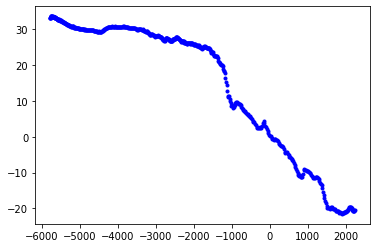

In [676]:
ydata = np.array([-20.394596, -20.519400, -20.647953, -20.596287, -20.656862, -20.678549, -20.317410, -20.307182, -20.231783, -19.876518, -19.737490, -19.654800, -19.677635, -19.767040, -19.719343, -19.708147, -19.977266, -20.171919, -20.437675, -20.578325, -20.641171, -20.714508, -20.915876, -21.113153, -21.090992, -21.125357, -21.067822, -21.128633, -21.275965, -21.518402, -21.330729, -21.135988, -21.232811, -21.098125, -21.179398, -20.900425, -20.762615, -20.602642, -20.821606, -20.837284, -20.636242, -20.228800, -20.128025, -20.124989, -20.040630, -19.872580, -19.678328, -19.615232, -19.803280, -20.048502, -19.812218, -19.737072, -19.947411, -19.371704, -18.589203, -17.925158, -17.146530, -16.131977, -15.302251, -14.281610, -13.404159, -13.117758, -12.815782, -12.379372, -11.870550, -11.440211, -11.162786, -11.153626, -11.272044, -11.376238, -11.400585, -11.413379, -11.230793, -10.880379, -10.609465, -10.216045, -10.071013, -9.9286146, -9.5839024, -9.5106010, -9.4286079, -9.3650513, -9.3374424, -9.0262356, -9.3684540, -10.297783, -11.085711, -11.100368, -11.151622, -10.760194, -10.847127, -10.562634, -10.064997, -9.6564732, -9.1061945, -8.3817062, -7.9498315, -7.4087639, -6.7791629, -6.5633759, -6.2197909, -5.8432918, -5.7235212, -5.5401692, -5.0951719, -4.7825189, -4.2411427, -4.1581383, -4.3969913, -4.2024255, -3.3105700, -2.7203081, -2.5651522, -2.6333375, -2.4927979, -2.3110125, -1.9959408, -1.6030889, -1.2933683, -0.89465916, -0.79807758, -0.67346430, -0.61078966, -0.87250328, -0.69307429, -0.49757057, -0.42761183, 0.10074841, 0.095702752, 0.45693210, 1.0245081, 1.5616286, 2.1701543, 2.5976233, 3.1310651, 3.8407738, 4.3111105, 3.9184155, 2.9292741, 2.5731580, 2.5784819, 2.6899529, 2.5006068, 2.4614985, 2.4318833, 2.7185273, 3.1625321, 3.6837616, 4.0345111, 4.0931401, 4.4042172, 4.8212323, 5.2040124, 5.5073600, 5.7156997, 5.7792554, 6.0263214, 6.4150763, 6.4526339, 6.6196136, 6.9149628, 7.0856638, 7.1813936, 7.5284390, 7.6214285, 8.0785551, 8.4090500, 8.7720032, 9.0748930, 9.0682364, 9.2667179, 9.4609985, 9.6867085, 9.4992981, 9.5845556, 9.3540754, 8.9761009, 8.4187307, 8.0087004, 8.5435543, 8.9125471, 8.5498505, 9.4281664, 10.019814, 10.612085, 11.385691, 11.191175, 11.499319, 12.827772, 14.409195, 15.310124, 16.362337, 17.695503, 18.338747, 18.464926, 18.862434, 19.642908, 20.001179, 19.957737, 20.141827, 20.297251, 20.447327, 20.844284, 20.868805, 21.177765, 21.904497, 22.271549, 22.501169, 22.551855, 22.468483, 22.589207, 22.538111, 22.544159, 22.835770, 23.157221, 23.724689, 23.601454, 23.553873, 23.415956, 23.749525, 23.883066, 24.060650, 24.410254, 24.786848, 24.666988, 24.861994, 24.760677, 24.747356, 24.750425, 24.747576, 24.995804, 25.165937, 24.978710, 25.000748, 25.215624, 25.309904, 25.067852, 25.043949, 24.962839, 24.822102, 24.672892, 24.600094, 24.617550, 24.797009, 25.015606, 24.990875, 24.958282, 25.090139, 25.355625, 25.560360, 25.483961, 25.276075, 25.247223, 25.363113, 25.515676, 25.724100, 25.691534, 25.739582, 25.716568, 25.775209, 25.511280, 25.544622, 25.819635, 25.909706, 25.996786, 25.968555, 26.012285, 26.211927, 26.211140, 26.217527, 26.011436, 26.173433, 26.210770, 25.959719, 26.024734, 26.131672, 26.249840, 26.161015, 26.116379, 25.918468, 25.986307, 26.120567, 26.209797, 26.078505, 26.110260, 26.155781, 26.211573, 26.538687, 26.620211, 26.295809, 26.290468, 26.460007, 26.638790, 26.683966, 26.828075, 26.596828, 26.414835, 26.440229, 26.625191, 26.730017, 26.905458, 26.940617, 27.104811, 27.231148, 27.220243, 27.336018, 27.438465, 27.482347, 27.479151, 27.590738, 27.752411, 27.678810, 27.823669, 27.866346, 27.705770, 27.555000, 27.445887, 27.342533, 27.328615, 27.325743, 27.141985, 27.192844, 27.277374, 27.379025, 27.129017, 27.017420, 26.963545, 26.822649, 26.723989, 26.617878, 26.650681, 26.678337, 26.769995, 26.841581, 27.021891, 27.069952, 27.066319, 27.274288, 27.165018, 27.238892, 27.324282, 27.417604, 27.513285, 27.521408, 27.596090, 27.477009, 27.259026, 26.878836, 26.726313, 26.841228, 26.862972, 27.030769, 27.145748, 27.031147, 27.283278, 27.504051, 27.877098, 27.903816, 27.900898, 27.862123, 27.953224, 27.981140, 28.002779, 28.038290, 28.080513, 28.295340, 28.194429, 28.132908, 27.982601, 27.975466, 27.969528, 27.961765, 28.018465, 28.190334, 28.358345, 28.278980, 28.442087, 28.600563, 28.557041, 28.564898, 28.497591, 28.499290, 28.515339, 28.591652, 28.741096, 28.873837, 29.056648, 29.212458, 29.468843, 29.447329, 29.306913, 29.171183, 29.370726, 29.518675, 29.610388, 29.577625, 29.876305, 30.004313, 29.894802, 29.844967, 29.948463, 29.956879, 29.949867, 30.067518, 30.082682, 30.083349, 29.835321, 29.910904, 30.062281, 30.123425, 30.134109, 30.316742, 30.380548, 30.362156, 30.371618, 30.444057, 30.402908, 30.306957, 30.323931, 30.378490, 30.424530, 30.395681, 30.413757, 30.471180, 30.502398, 30.537090, 30.541309, 30.553112, 30.508968, 30.497620, 30.575794, 30.681610, 30.769608, 30.773464, 30.707340, 30.699522, 30.714964, 30.739033, 30.531391, 30.514322, 30.566006, 30.669735, 30.537333, 30.547976, 30.631292, 30.520660, 30.667828, 30.698847, 30.774302, 30.688238, 30.651785, 30.684608, 30.740019, 30.815407, 30.665756, 30.653332, 30.542889, 30.636663, 30.591862, 30.545660, 30.557173, 30.546276, 30.501284, 30.452755, 30.401079, 30.404757, 30.319004, 30.105505, 30.042484, 29.935146, 29.793201, 29.688934, 29.523327, 29.515184, 29.434927, 29.297091, 29.192596, 29.312761, 29.317266, 29.422386, 29.273722, 29.174030, 29.272568, 29.353287, 29.549065, 29.518696, 29.507931, 29.493597, 29.506313, 29.393923, 29.438198, 29.701874, 29.727930, 29.660038, 29.742424, 29.776186, 29.740829, 29.854008, 29.770927, 29.793209, 29.773632, 29.772310, 29.816418, 29.835472, 29.860497, 29.857513, 29.855730, 29.895174, 29.922728, 29.914471, 29.991211, 30.032993, 30.077705, 30.110962, 30.154144, 30.174534, 30.132906, 30.169336, 30.184444, 30.160755, 30.162401, 30.142653, 30.244108, 30.291304, 30.274239, 30.311161, 30.384291, 30.301708, 30.314943, 30.461016, 30.376045, 30.526266, 30.417183, 30.353838, 30.614412, 30.614763, 30.778538, 30.879175, 30.747757, 30.804522, 30.745964, 30.722317, 30.866579, 30.884880, 30.989170, 31.022114, 31.025145, 31.140846, 31.171759, 31.240854, 31.196779, 31.223415, 31.292919, 31.400129, 31.388029, 31.421396, 31.474060, 31.545094, 31.602924, 31.698368, 31.746595, 31.781338, 31.749746, 31.790682, 31.909592, 31.980505, 31.935555, 32.025879, 32.110046, 32.135300, 32.217731, 32.273735, 32.391182, 32.461491, 32.373112, 32.397091, 32.492718, 32.415588, 32.458378, 32.552238, 32.431953, 32.589294, 32.572575, 32.720463, 32.586941, 32.697155, 32.758369, 32.915695, 32.703514, 32.840302, 32.922337, 32.794712, 32.876385, 32.974194, 33.066685, 33.051281, 33.105850, 33.119099, 33.180035, 33.251392, 33.245899, 33.215569, 33.250900, 33.289078, 33.352978, 33.366974, 33.381283, 33.392151, 33.378967, 33.430573, 33.438690, 33.402718, 33.495621, 33.484299, 33.458866, 33.386925, 33.346672, 33.447212, 33.569599, 33.561386, 33.481026, 33.401642, 33.373638, 33.372475, 33.525280, 33.563244, 33.529503, 33.354115, 33.495491, 33.613655, 33.384956, 33.498554, 33.541615, 33.413643, 33.603889, 33.593300, 33.499271, 33.429173, 33.330570, 33.365322, 33.404743, 33.363697, 33.260464, 33.249954, 33.189499, 33.160019])
xdata = np.array([2233.44853210449, 2225.02537536621, 2216.38084411621, 2207.71310424805, 2198.63076019287, 2189.53291320801, 2180.01483917236, 2170.27330017090, 2160.53084564209, 2150.35144805908, 2140.18314361572, 2129.56593322754, 2118.72734451294, 2107.91210937500, 2096.63565826416, 2085.39481830597, 2073.68055343628, 2061.74491024017, 2049.85961151123, 2037.48615264893, 2025.17001342773, 2012.35869598389, 1999.32599639893, 1986.36816406250, 1972.89765167236, 1959.50873565674, 1945.60035705566, 1931.47059631348, 1917.44023132324, 1902.87266540527, 1888.41427612305, 1873.40890502930, 1858.18214416504, 1843.07583618164, 1827.41120910645, 1811.88027954102, 1795.77783203125, 1779.45401000977, 1763.27493286133, 1746.51699829102, 1729.90979003906, 1712.71029663086, 1695.28942871094, 1678.04150390625, 1660.18283081055, 1642.50283813477, 1624.20629882813, 1605.68838500977, 1587.36791992188, 1568.41217041016, 1549.65942382813, 1530.44763183594, 1511.20983886719, 1492.37646484375, 1473.09570312500, 1454.22467041016, 1434.90093994141, 1415.55548095703, 1396.61688232422, 1377.22851562500, 1358.25225830078, 1338.82092285156, 1319.36785888672, 1300.32836914063, 1280.83233642578, 1261.74652099609, 1242.20758056641, 1222.64691162109, 1203.50219726563, 1183.89855957031, 1164.70745849609, 1145.06085205078, 1125.39257812500, 1106.14263916016, 1086.43139648438, 1067.13952636719, 1047.38537597656, 1027.60949707031, 1008.25000000000, 988.431152343750, 969.034057617188, 949.172241210938, 929.288696289063, 909.823974609375, 889.897460937500, 870.395141601563, 850.425659179688, 830.434570312500, 810.869018554688, 790.834960937500, 771.222900390625, 751.145874023438, 731.047119140625, 711.376342773438, 691.234619140625, 671.517333984375, 651.332641601563, 631.130737304688, 611.350219726563, 591.100952148438, 571.282958984375, 550.990722656250, 530.676757812500, 510.791015625000, 490.434082031250, 470.510864257813, 450.110961914063, 429.689331054688, 409.703002929688, 389.238403320313, 369.205444335938, 348.697998046875, 328.168823242188, 308.077270507813, 287.505126953125, 267.366943359375, 246.751831054688, 226.114990234375, 205.918212890625, 185.238403320313, 164.999633789063, 144.276855468750, 123.532348632813, 103.225708007813, 82.4383544921875, 62.0943603515625, 41.2640380859375, 20.4118652343750, 0, -20.8950195312500, -41.3442382812500, -62.2822265625000, -83.2419433593750, -103.754394531250, -124.757080078125, -145.316162109375, -166.361816406250, -187.429199218750, -208.046875000000, -229.157226562500, -249.821533203125, -270.842529296875, -291.745361328125, -312.079101562500, -332.761962890625, -352.871582031250, -373.329833984375, -393.674560546875, -413.458251953125, -433.578613281250, -453.138183593750, -473.033935546875, -492.816162109375, -512.049560546875, -531.602783203125, -550.616699218750, -569.949951171875, -589.169677734375, -607.848632812500, -626.843750000000, -645.307373046875, -664.077880859375, -682.734863281250, -700.863769531250, -719.296142578125, -737.209716796875, -755.413574218750, -773.508056640625, -791.091064453125, -808.960937500000, -826.320312500000, -843.965576171875, -861.497314453125, -878.530029296875, -895.837158203125, -912.646484375000, -929.729248046875, -946.698486328125, -963.177490234375, -979.922119140625, -996.185302734375, -1012.70532226563, -1029.11181640625, -1045.04077148438, -1061.22290039063, -1076.93579101563, -1092.89331054688, -1108.73364257813, -1124.11596679688, -1139.73535156250, -1155.24121093750, -1170.28955078125, -1185.57104492188, -1200.40332031250, -1215.46020507813, -1230.40356445313, -1244.90185546875, -1259.62060546875, -1273.90258789063, -1288.39355468750, -1302.77416992188, -1316.72558593750, -1330.88183593750, -1344.61059570313, -1358.54223632813, -1372.36035156250, -1385.76171875000, -1399.35522460938, -1412.53393554688, -1425.90283203125, -1439.15820312500, -1452.00634765625, -1465.03735351563, -1477.66894531250, -1490.47534179688, -1503.16821289063, -1515.46630859375, -1527.93457031250, -1540.01611328125, -1552.26000976563, -1564.39038085938, -1576.13842773438, -1588.04418945313, -1599.57275390625, -1611.25390625000, -1622.82153320313, -1634.02221679688, -1645.36523437500, -1656.34375000000, -1667.46240234375, -1678.47631835938, -1689.21289062500, -1700.15649414063, -1710.82666015625, -1721.70458984375, -1732.54833984375, -1743.11596679688, -1753.89184570313, -1764.39550781250, -1775.10327148438, -1785.77685546875, -1796.17822265625, -1806.78393554688, -1817.12133789063, -1827.65673828125, -1838.16015625000, -1848.39746093750, -1858.83276367188, -1869.00146484375, -1879.36889648438, -1889.70214843750, -1899.77319335938, -1910.03833007813, -1920.04052734375, -1930.23779296875, -1940.40087890625, -1950.30322265625, -1960.39819335938, -1970.23632812500, -1980.26342773438, -1990.25634765625, -1999.99218750000, -2009.91699218750, -2019.58862304688, -2029.44555664063, -2039.26831054688, -2048.83764648438, -2058.59252929688, -2068.09545898438, -2077.78247070313, -2087.43481445313, -2096.84008789063, -2106.42456054688, -2115.76147460938, -2125.27807617188, -2134.76049804688, -2143.99926757813, -2153.41381835938, -2162.58422851563, -2171.93090820313, -2181.24291992188, -2190.31323242188, -2199.55737304688, -2208.56323242188, -2217.73950195313, -2226.88159179688, -2235.78540039063, -2244.85961914063, -2253.69946289063, -2262.70532226563, -2271.67504882813, -2280.41479492188, -2289.31860351563, -2297.98999023438, -2306.82592773438, -2315.62768554688, -2324.20092773438, -2332.93481445313, -2341.43969726563, -2350.10522460938, -2358.73657226563, -2367.14135742188, -2375.70483398438, -2384.04516601563, -2392.54077148438, -2400.81274414063, -2409.24047851563, -2417.63403320313, -2425.80786132813, -2434.13305664063, -2442.23901367188, -2450.49633789063, -2458.71948242188, -2466.72534179688, -2474.88061523438, -2482.82202148438, -2490.90942382813, -2498.96215820313, -2506.80151367188, -2514.78637695313, -2522.58520507813, -2530.63403320313, -2538.75805664063, -2546.77416992188, -2555.04711914063, -2563.20874023438, -2571.63061523438, -2580.12768554688, -2588.51000976563, -2597.15600585938, -2605.68237304688, -2614.47680664063, -2623.34692382813, -2632.09399414063, -2641.11254882813, -2650.00317382813, -2659.17065429688, -2668.41333007813, -2677.52319335938, -2686.91479492188, -2696.17211914063, -2705.71264648438, -2715.32836914063, -2724.80297851563, -2734.56762695313, -2744.18969726563, -2754.10327148438, -2764.09008789063, -2773.93139648438, -2784.06909179688, -2794.05395507813, -2804.34057617188, -2814.70239257813, -2824.90844726563, -2835.41918945313, -2845.76879882813, -2856.42846679688, -2867.16333007813, -2877.73413085938, -2888.61547851563, -2899.33178710938, -2910.36450195313, -2921.47241210938, -2932.40551757813, -2943.66235351563, -2954.74340820313, -2966.14916992188, -2977.63012695313, -2988.92797851563, -3000.55786132813, -3012.00122070313, -3023.78002929688, -3035.63403320313, -3047.29907226563, -3059.30200195313, -3071.11010742188, -3083.26147460938, -3095.48852539063, -3107.51831054688, -3119.89379882813, -3132.06665039063, -3144.59106445313, -3157.19067382813, -3169.58227539063, -3182.33081054688, -3194.87084960938, -3207.76831054688, -3220.74096679688, -3233.49731445313, -3246.61889648438, -3259.52368164063, -3272.79418945313, -3286.13696289063, -3299.26098632813, -3312.75561523438, -3326.02221679688, -3339.66577148438, -3353.38452148438, -3366.87329101563, -3380.74096679688, -3394.37231445313, -3408.38891601563, -3422.48071289063, -3436.33422851563, -3450.57153320313, -3464.57055664063, -3478.96020507813, -3493.42504882813, -3507.63989257813, -3522.25366210938, -3536.58715820313, -3551.22778320313, -3565.85083007813, -3580.12963867188, -3594.71752929688, -3608.96557617188, -3623.51538085938, -3638.05053710938, -3652.24682617188, -3666.74731445313, -3680.90600585938, -3695.37133789063, -3709.81909179688, -3723.92993164063, -3738.34252929688, -3752.41577148438, -3766.79321289063, -3781.15307617188, -3795.17456054688, -3809.49926757813, -3823.48999023438, -3837.78002929688, -3852.05249023438, -3865.98852539063, -3880.22583007813, -3894.13061523438, -3908.33276367188, -3922.51440429688, -3936.36791992188, -3950.51733398438, -3964.33325195313, -3978.44799804688, -3992.54467773438, -4006.31225585938, -4020.37426757813, -4034.10473632813, -4048.13159179688, -4062.14086914063, -4075.82299804688, -4089.79418945313, -4103.44213867188, -4117.38159179688, -4131.30297851563, -4144.89624023438, -4158.78295898438, -4172.34497070313, -4186.19653320313, -4200.03051757813, -4213.53784179688, -4227.33666992188, -4240.81274414063, -4254.57348632813, -4268.31958007813, -4281.74438476563, -4295.45581054688, -4308.84301757813, -4322.51928710938, -4336.17797851563, -4349.51684570313, -4363.14038085938, -4376.44213867188, -4390.03051757813, -4403.60131835938, -4416.85131835938, -4430.38696289063, -4443.60620117188, -4457.10717773438, -4470.59057617188, -4483.75512695313, -4497.20336914063, -4510.33666992188, -4523.74975585938, -4537.14526367188, -4550.22387695313, -4563.58422851563, -4576.62866210938, -4589.95434570313, -4603.26196289063, -4616.25805664063, -4629.53100585938, -4642.48999023438, -4655.72778320313, -4668.94799804688, -4681.85815429688, -4695.04028320313, -4707.91625976563, -4721.06665039063, -4734.19897460938, -4747.02075195313, -4760.11840820313, -4772.88159179688, -4785.85180664063, -4798.73803710938, -4811.25463867188, -4823.97534179688, -4836.33276367188, -4848.88549804688, -4861.35717773438, -4873.47094726563, -4885.77709960938, -4897.72631835938, -4909.86694335938, -4921.92358398438, -4933.63159179688, -4945.52270507813, -4957.06616210938, -4968.79174804688, -4980.43383789063, -4991.73364257813, -5003.21020507813, -5014.35083007813, -5025.66186523438, -5036.88891601563, -5047.78344726563, -5058.84497070313, -5069.58032226563, -5080.47631835938, -5091.28881835938, -5101.77807617188, -5112.42504882813, -5122.75219726563, -5133.23364257813, -5143.63159179688, 
       -5153.71752929688, -5163.94995117188, -5173.87182617188, -5183.93872070313, -5193.92163085938, -5203.60180664063, -5213.41918945313, -5222.93530273438, -5232.58715820313, -5242.15551757813, -5251.42797851563, -5260.83081054688, -5269.94360351563, -5279.18090820313, -5288.33422851563, -5297.20141601563, -5306.18920898438, -5314.89624023438, -5323.71850585938, -5332.45532226563, -5340.91870117188, -5349.49194335938, -5357.79174804688, -5366.19946289063, -5374.52319335938, -5382.58129882813, -5390.73950195313, -5398.63354492188, -5406.62622070313, -5414.53540039063, -5422.18579101563, -5429.92944335938, -5437.41967773438, -5444.99780273438, -5452.49194335938, -5459.73706054688, -5467.06567382813, -5474.15063476563, -5481.31372070313, -5488.39331054688, -5495.23266601563, -5502.14672851563, -5508.82446289063, -5515.57299804688, -5522.23803710938, -5528.67358398438, -5535.17309570313, -5541.44506835938, -5547.77905273438, -5554.02905273438, -5560.05883789063, -5566.14331054688, -5572.01000976563, -5577.92895507813, -5583.76440429688, -5589.38745117188, -5595.05737304688, -5600.51977539063, -5606.02416992188, -5611.44458007813, -5616.66186523438, -5621.91674804688, -5626.97338867188, -5632.06274414063, -5637.06713867188, -5641.88012695313, -5646.72045898438, -5651.37084960938, -5656.04565429688, -5660.63647460938, -5665.04418945313, -5669.46948242188, -5673.71411132813, -5677.97387695313, -5682.15014648438, -5686.15209960938, -5690.16186523438, -5694.00170898438, -5697.84692382813, -5701.60815429688, -5705.20385742188, -5708.79956054688, -5712.23413085938, -5715.66430664063, -5719.01098632813, -5722.20092773438, -5725.38208007813, -5728.41088867188, -5731.42553710938, -5734.35766601563, -5737.14282226563, -5739.90893554688, -5742.53149414063, -5745.13208007813, -5747.64916992188, -5750.02856445313, -5752.38012695313, -5754.59741210938, -5756.78344726563, -5758.88598632813, -5760.85961914063, -5762.79663085938, -5764.64965820313, -5766.38012695313, -5768.06762695313, -5769.63549804688, -5771.15747070313, -5772.59594726563, -5773.92065429688, -5775.19311523438, -5776.35571289063, -5777.46313476563, -5778.48657226563])

py.clf()
py.plot(xdata, ydata, 'b.')
py.show()


Одной из характеристик токовых слоев является наличие вложенностей. 
Исходя из графика пространственного профиля можно сделать предположение о том, что вложенный слой присутствует. Простейшая модель Харриса,
обозначенная выше, этих вложенностей не учитывает, поэтому мы проведем анализ пересечения сначала по простой модели, а затем по модели,
учитывающей наличие вложенности.

### 1. Простая модель Харриса

Известно, что отклонения от модели можно считать распределенными по нормали с некоторой дисперсией. Следовательно можно записать функцию распределения: 
$$ f(B_l) = \frac{1}{\sqrt{2\pi}\sigma} exp \left(-\frac{(B_l-\mu)^2}{2 \sigma^2} \right)$$, где $\mu$ - модельное значение магнитного поля, а $B_l$ - значение, полученное экспериментально.

Наша выборка состоит из $N = 646$ независимых измерений, то суммарная функция плотности вероятности есть произведение этих функций:
$$ \prod_{i=1}^{N} p(B_{l_i}, B_0, L) = f(B_{l_i}) = \tilde{L}(B_{l_1}, B_{l_2}, B_{l_N}, B_0, L)$$


Эта функция является функцией правдоподобия выборки c 2 свободными параметрами. Для их нахождения необходимо максимизировать функцию максимального правдоподобия. Удобно взять натуральный логарифм от функции правдоподобия, тогда произведение заменится на сумму (логарифмирование не влияет на положение максимума). 
$$ ln(\tilde{L}(B_{l_1}, B_{l_2}, B_{l_N}, B_0, L))= \sum_{i=1}^{N} ln(f(B_{l_i})) = \sum_{i=1}^{N} ln \left( \frac{1}{\sqrt{2\pi}\sigma} \right) + \left(-\frac{(B_l-\mu)^2}{2 \sigma^2} \right) $$

In [677]:
def harris(params):
    B0 = params[0]  # свободный параметр B_0
    L0 = params[1]  # свободный параметр L
    sd = params[2]  # дисперсия, с которой распределены отклонения от модели
    
    yPred =  B0 * np.tanh(xdata / L0)  # модельное значение магнитного поля

    LL = np.sum( -stats.norm.logpdf(ydata, loc=yPred, scale=sd ) )  # логарифм функции правдоподобия
    return LL

Максимум будем искать с помощью функции minimize библиотеки scipy. Выберем начальные значения свободных параметров и получим их эффективную оценку

Optimization terminated successfully.
         Current function value: 1389.563968
         Iterations: 4
         Function evaluations: 148
B0 = -32.40445949429926 L = 2221.3283472760313


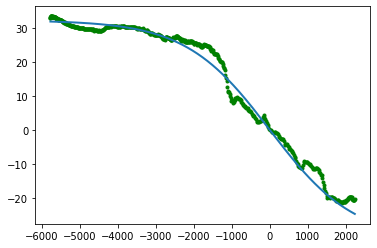

In [678]:
initParams = [20, 2000, 1]

results = minimize(harris, initParams, method='Powell', options={'maxiter': 1e3, 'disp': True})
print ('B0 = '+ str(results.x[0]) + ' L = '+ str(results.x[1]) )
estParms = results.x
LL_2 = results.fun

# yOut = yPred = 1 / (1+ np.exp(-estParms[0]*(xdata-estParms[1])))
yOut =  yPred =  estParms[0] * np.tanh(xdata / estParms[1]) # модельное значение с наилучшими параметрами
py.clf()
py.plot(xdata, ydata, 'g.')
py.plot(xdata, yOut, linewidth=2)
py.show()

In [679]:
results.x

array([-32.40445949, 2221.32834728, 2.07710942])

Как видим, полученные значения свободных параметров функции Харриса ведут к довольно качественной аппроксимации экспериментальных данных.
Посчитаем значение суммы квадратов ошибок:

In [680]:
sum_squared_1 = 0
for i in range(len(ydata)):
    if abs(yOut[i])>0:
        sum_squared_1 += (yOut[i]-ydata[i])**2
print(f'Значение суммы квадратов ошибок для модели без учета вложенности: {sum_squared_1}')

Значение суммы квадратов ошибок для модели без учета вложенности: 2793.2814094900605


Произведем вычисления матрицы Фишера. Она поможет нам для определения погрешности свободных параметров.
Матрица Фишера - гессиан для логарифма функции правдоподобия по свободным параметрам:
\begin{pmatrix}
\frac{\partial^2 ln \tilde{L}}{\partial L^2} & \frac{\partial^2 ln \tilde{L}}{\partial L \partial B_0} \\
\frac{\partial^2 ln \tilde{L}}{\partial B_0 \partial L} & \frac{\partial^2 ln \tilde{L}}{\partial {B_0}^2}
\end{pmatrix}

Первое слагаемое функции правдоподобия не зависит от свободных параметров, следовательно производные берутся от функции $ ln(\tilde{L}(B_{l_1}, B_{l_2}, B_{l_N}, B_0, L)) = \sum_{i=1}^{N} \left(-\frac{(B_l-\mu)^2}{2 \sigma^2} \right) $. Производные будем находить с помощью библиотеки символьных вычислений sympy, а также численно.

In [681]:
def hess():
#Derivatives of multivariable function
    x, y, b, l, s = sym.symbols('x y b l s')
    f = - (y-b*tanh(x/l))**2/(2*s**2)# + ln(1/sqrt(2*pi)/s) 
#     print(f)
    #Differentiating partially w.r.t x
    derivative_f_b = f.diff(b)
    derivative_f_l = f.diff(l)
#     print(derivative_f_b)
#     print(derivative_f_l)
    derivative_f_bb = derivative_f_b.diff(b)
    derivative_f_ll = derivative_f_l.diff(l)
    derivative_f_bl = derivative_f_b.diff(l)
    derivative_f_lb = derivative_f_l.diff(b) 
    lam_derivative_f_bb = lambdify((x, y, b, l, s), derivative_f_bb)
    lam_derivative_f_ll = lambdify((x, y, b, l, s), derivative_f_ll)
    lam_derivative_f_bl = lambdify((x, y, b, l, s), derivative_f_bl)
    lam_derivative_f_lb = lambdify((x, y, b, l, s), derivative_f_lb)
    hess_matrix = np.zeros((2, 2))
    hess_matrix[0][0] = sum(lam_derivative_f_bb(xdata, ydata, results.x[0], results.x[1], results.x[2]))
    hess_matrix[1][1] = sum(lam_derivative_f_ll(xdata, ydata, results.x[0], results.x[1], results.x[2]))
    if derivative_f_bl == derivative_f_lb:
        hess_matrix[1][0] = hess_matrix[0][1] = sum(lam_derivative_f_bl(xdata, ydata, results.x[0], results.x[1], results.x[2]))
    else:
        print('no')
        raise AssertionError
    return -hess_matrix

In [682]:
def hess_comp(step_1, step_2):
    hess_matrix = np.zeros((2,2))
    hess_matrix[0][0] = -(harris([results.x[0] + step_1, results.x[1], results.x[2]]) -
                         2 * harris([results.x[0], results.x[1], results.x[2]]) +
                          harris([results.x[0] - step_1, results.x[1], results.x[2]])) / (step_1**2)
    hess_matrix[1][1] = -(harris([results.x[0], results.x[1] + step_2, results.x[2]]) - 
                         2 * harris([results.x[0], results.x[1], results.x[2]]) +
                          harris([results.x[0], results.x[1] - step_2, results.x[2]])) / (step_2**2)
    hess_matrix[0][1] = hess_matrix[1][0] = -(1 / (4 * step_1 * step_2)) * (
        harris([results.x[0] + step_1, results.x[1] + step_2, results.x[2]]) -
        harris([results.x[0] + step_1, results.x[1] - step_2, results.x[2]]) -
        harris([results.x[0] - step_1, results.x[1] + step_2, results.x[2]]) +
        harris([results.x[0] - step_1, results.x[1] - step_2, results.x[2]])
    )
    return -hess_matrix
    

In [683]:
hess_matrix_sym = hess()
print(hess_matrix_sym)

[[91.28922423 0.39770235]
 [0.39770235 0.00293307]]


In [684]:
hess_matrix_comp = hess_comp(0.001, 0.001)
print(hess_matrix_comp)

[[91.28922443 0.39770237]
 [0.39770237 0.00293335]]


Значения матриц совпадают, что указывает на правильность вычислений. 

Найдем ковариационную матрицу D (она является обратной к матрице Фишера). На ее главной диагонали стоят дисперсии свободных параметров, а в остальных ячейках $D_{ab} = \rho_{ab} \sigma_{a} \sigma_b $. Коэффициент $\rho_{ab}$ называется коэффициентом корреляции параметров a и b. Соответственно корреляции параметров $B_0$ и $L$ выражается как $r(B_0, L) = D_{12} / \sqrt{D_{11} D_{22}} $, где $i, j$ - индексы ковариационной матрицы, а погрешности - $\sigma_{B_0} = \sqrt{D_{11}}$, $\sigma_{L} = \sqrt{D_{22}}$, 

In [685]:
cov_matrix = np.linalg.inv(hess_matrix_sym)
print(cov_matrix)

[[0.02676386 -3.62897456]
 [-3.62897456 833.00054326]]


In [686]:
corr = cov_matrix[0][1]/np.sqrt(cov_matrix[0][0]*cov_matrix[1][1])

In [687]:
sigma_B = np.sqrt(cov_matrix[0][0])
sigma_L = np.sqrt(cov_matrix[1][1])
print(f'Погрешность B0 = {sigma_B}')
print(f'Погрешность L = {sigma_L}')

Погрешность B0 = 0.163596627640754
Погрешность L = 28.86174879074193


In [688]:
print(f'Корреляция между параметрами B0 и L = {corr}')

Корреляция между параметрами B0 и L = -0.7685762043899329


Получившуюся корреляцию можно отнести к сильным, чему я не могу найти физического объяснения

### 2.  Модель Харриса со вложенным слоем

Исходя из вида профиля $B_l(z)$ можно сделать предположение, что мы имеем дело со вложенным токовым слоем. В качестве модели, аппроксимирующей профиль выберем функцию:
$$  
B_l(z) = B_1 \text{th}\left(\frac{z}{L_1}\right) + B_2 \text{th}\left(\frac{z}{L_2}\right)
$$ 
Таким образом мы представляем наш профиль как сумму вложенного и фонового слоев, и каждый из них аппроксимируем вышеописанной формулой Харриса, но с различными свободными параметрами.

In [689]:
def sum_harris(params):
    B1 = params[0]  # свободный параметр B_0
    L1 = params[1]
    B2 = params[2]
    L2 = params[3]
    sd = 1.91
    sd = params[4] # дисперсия, с которой распределены отклонения от модели
#     L = params[5]
    yPred =  B1 * np.tanh(xdata / L1) + B2 * np.tanh((xdata - 450)/ L2) # модельное значение магнитного поля
#     yPred =  B1 * np.tanh(xdata / L1) + B2 * np.tanh((xdata - L)/ L2)  # модельное значение магнитного поля

    LL = np.sum( -stats.norm.logpdf(ydata, loc=yPred, scale=sd ) )  # логарифм функции правдоподобия
    return LL

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1313.800391512554
            Iterations: 72
            Function evaluations: 548
            Gradient evaluations: 72
B1 = -20.950083484943136; L1 = 1900.0631906192439
B2 = -11.800133874443224, L2 = 3292.168172483667


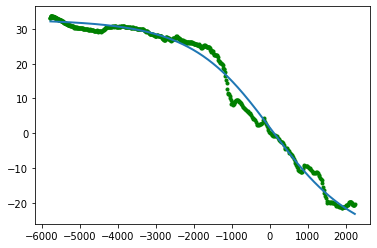

In [690]:
# initParams = [20, -3e3, 10, 1e3, 1]
initParams = [-10, 0.5e3, -10, 1.5e3, 1]
# initParams = [-25, 4.0e3, -15, 1.3e3, 1, 0.1e3]
# cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
#         {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
#         {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
# bnds = ((None, -0.01), (0.8e3, 1.5e3), (None, -0.1), (1.5e3, 3e3), (None, None))
# bnds = ((-25, -10), (0, 1e3), (-25, -15), (1e3, 2e3), (None, None))
bnds = ((None, 0), (0, 2e3), (None, 0), (1.2e3, None), (None, None))
results = minimize(sum_harris, initParams, method='SLSQP', options={'maxiter': 1e5, 'disp': True}, bounds = bnds)
LL_4 = results.fun
print(f'B1 = {results.x[0]}; L1 = {results.x[1]}\nB2 = {results.x[2]}, L2 = {results.x[3]}')
estParms = results.x
# yOut = yPred = 1 / (1+ np.exp(-estParms[0]*(xdata-estParms[1])))
# yOut = yPred = estParms[0] * np.tanh(xdata / estParms[1]) + estParms[2] * np.tanh(xdata / estParms[3]) + estParms[4] * np.tanh(xdata / estParms[5])
yOut = yPred = estParms[0] * np.tanh(xdata / estParms[1]) + estParms[2] * np.tanh((xdata-450) / estParms[3])
py.clf()
py.plot(xdata, ydata, 'g.')
py.plot(xdata, yOut, linewidth=2)
py.show()

In [691]:
results.x

array([-20.95008348, 1900.06319062, -11.80013387, 3292.16817248,
       1.84931495])

In [692]:
sum_squared_2 = 0
for i in range(len(ydata)):
    sum_squared_2 += (yOut[i]-ydata[i])**2
print(f'Значение суммы квадратов ошибок для модели с учетом вложенности: {sum_squared_2}')
print(f'Значение суммы квадратов ошибок для модели без учета вложенности: {sum_squared_1}')

Значение суммы квадратов ошибок для модели с учетом вложенности: 2209.266655709423
Значение суммы квадратов ошибок для модели без учета вложенности: 2793.2814094900605


In [693]:
stats.distributions.chi2.sf((2 * LL_2 - 2 * LL_4)/np.sqrt(len(xdata)), 2)

0.05074825562222279

In [694]:
results.x

array([-20.95008348, 1900.06319062, -11.80013387, 3292.16817248,
       1.84931495])

Как видим, модель с большим числом параметров дает меньшую сумму квадратов ошибок, то есть лучше приближает данные. Это согласуется с теорическим представлением.

Произведем вычисление матрицы Фишера для этой модели. Расчет аналогичен предыдущему, за исключением того, что дифференцирование ведется по 4 параметрам (размерность матрицы - 4 x 4)

In [695]:
def hess_2():
#Derivatives of multivariable function
    x, y, b1, l1, b2, l2, s = sym.symbols('x y b1 l1 b2 l2 s')
    f = -(y-(b1*tanh(x/l1)+b2*tanh((x-500)/l2)))**2/(2*s**2)
#     print(f)
    #Differentiating partially w.r.t x
    derivative_f_b1 = f.diff(b1)
    derivative_f_l1 = f.diff(l1)
    derivative_f_b2 = f.diff(b2)
    derivative_f_l2 = f.diff(l2)
    
    derivative_f_b1b1 = derivative_f_b1.diff(b1)
    derivative_f_l1l1 = derivative_f_l1.diff(l1)
    derivative_f_b2b2 = derivative_f_b2.diff(b2)
    derivative_f_l2l2 = derivative_f_l2.diff(l2) 
    
    derivative_f_b1l1 = derivative_f_b1.diff(l1)
    derivative_f_b1b2 = derivative_f_b1.diff(b2)
    derivative_f_b1l2 = derivative_f_b1.diff(l2)
    
    derivative_f_l1b2 = derivative_f_l1.diff(b2)
    derivative_f_l1l2 = derivative_f_l1.diff(l2)

    derivative_f_b2l2 = derivative_f_b2.diff(l2)


    lam_derivative_f_b1b1 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_b1b1)
    lam_derivative_f_l1l1 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_l1l1)
    lam_derivative_f_b2b2 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_b2b2)
    lam_derivative_f_l2l2 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_l2l2)


    lam_derivative_f_b1l1 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_b1l1)
    lam_derivative_f_b1b2 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_b1b2)
    lam_derivative_f_b1l2 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_b1l2)

    lam_derivative_f_l1b2 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_l1b2)
    lam_derivative_f_l1l2 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_l1l2)

    lam_derivative_f_b2l2 = lambdify((x, y, b1, l1, b2, l2, s), derivative_f_b2l2)


    
    hess_matrix = np.zeros((4, 4))
    print(results.x)
    hess_matrix[0][0] = sum(lam_derivative_f_b1b1(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    hess_matrix[1][1] = sum(lam_derivative_f_l1l1(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    hess_matrix[2][2] = sum(lam_derivative_f_b2b2(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    hess_matrix[3][3] = sum(lam_derivative_f_l2l2(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))

    hess_matrix[0][1] = sum(lam_derivative_f_b1l1(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    hess_matrix[0][2] = sum(lam_derivative_f_b1b2(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    hess_matrix[0][3] = sum(lam_derivative_f_b1l2(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    
    hess_matrix[1][2] = sum(lam_derivative_f_l1b2(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    hess_matrix[1][3] = sum(lam_derivative_f_l1l2(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))

    hess_matrix[2][3] = sum(lam_derivative_f_b2l2(xdata, ydata, results.x[0], results.x[1], results.x[2], results.x[3], results.x[4]))
    
    hess_matrix[3][2] = hess_matrix[2][3]
    
    hess_matrix[3][1] = hess_matrix[1][3]
    hess_matrix[2][1] = hess_matrix[1][2]
    
    hess_matrix[3][0] = hess_matrix[0][3]
    hess_matrix[2][0] = hess_matrix[0][2]
    hess_matrix[1][0] = hess_matrix[0][1]
    return -hess_matrix

In [696]:
float_formatter = "{:.8f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
hess_matrix = hess_2()
print(hess_matrix)

[-20.95008348 1900.06319062 -11.80013387 3292.16817248 1.84931495]
[[125.48476573 0.34899454 107.44757215 0.16107675]
 [0.34899454 0.00191898 0.26382295 0.00060706]
 [107.44757215 0.26382295 94.80141398 0.13592925]
 [0.16107675 0.00060706 0.13592925 0.00025955]]


In [697]:
cov_matrix = np.linalg.inv(hess_matrix)
print(cov_matrix)

[[0.79587573 -53.35704265 -0.90045675 102.45381782]
 [-53.35704265 6242.24997399 66.47344880 -16299.22229206]
 [-0.90045675 66.47344880 1.07511128 -159.69630664]
 [102.45381782 -16299.22229206 -159.69630664 62025.87500069]]


In [698]:
sigma_B1 = np.sqrt(cov_matrix[0][0])
sigma_L1 = np.sqrt(cov_matrix[1][1])
sigma_B2 = np.sqrt(cov_matrix[2][2])
sigma_L2 = np.sqrt(cov_matrix[3][3])
print(f'Погрешность B1 = {sigma_B1}')
print(f'Погрешность L1 = {sigma_L1}')
print(f'Погрешность B2 = {sigma_B2}')
print(f'Погрешность L2 = {sigma_L2}')

Погрешность B1 = 0.8921186764023404
Погрешность L1 = 79.00791083168777
Погрешность B2 = 1.036875731176766
Погрешность L2 = 249.0499447915783


In [699]:
corr_B1_L1 = cov_matrix[0][1]/np.sqrt(cov_matrix[0][0]*cov_matrix[1][1])
corr_B1_B2 = cov_matrix[0][2]/np.sqrt(cov_matrix[0][0]*cov_matrix[2][2])
corr_B1_L2 = cov_matrix[0][3]/np.sqrt(cov_matrix[0][0]*cov_matrix[3][3])
corr_L1_B2 = cov_matrix[1][2]/np.sqrt(cov_matrix[1][1]*cov_matrix[2][2])
corr_L1_L2 = cov_matrix[1][3]/np.sqrt(cov_matrix[1][1]*cov_matrix[3][3])
corr_B2_L2 = cov_matrix[2][3]/np.sqrt(cov_matrix[2][2]*cov_matrix[3][3])
print(f'Корреляция между параметрами B1 и L1 = {corr_B1_L1}')
print(f'Корреляция между параметрами B1 и B2 = {corr_B1_B2}')
print(f'Корреляция между параметрами B1 и L2 = {corr_B1_L2}')
print(f'Корреляция между параметрами L1 и B2 = {corr_L1_B2}')
print(f'Корреляция между параметрами L1 и L2 = {corr_L1_L2}')
print(f'Корреляция между параметрами B2 и L2 = {corr_B2_L2}')

Корреляция между параметрами B1 и L1 = -0.7570046392373257
Корреляция между параметрами B1 и B2 = -0.9734497065598732
Корреляция между параметрами B1 и L2 = 0.46112542163179343
Корреляция между параметрами L1 и B2 = 0.81142974512234
Корреляция между параметрами L1 и L2 = -0.8283423292691825
Корреляция между параметрами B2 и L2 = -0.6184174173589801


Покажем значимость модели с вложенным слоем относительно простой модели с помощью критерия хи-квадрат. 
Для сравнения двух любых моделей с разным числом параметров известно следующее:
$$ (-2 \cdot \text{ln} (L_q)) - (-2 \cdot \text{ln} (L_p)) \sim \chi^2_{p-q}, p > q$$
В нашем случае p = 4, q = 2, следовательно разность соответствует статистике хи-квадрат с 2 степенями свободы

Проверяем гипотезу $H_0$: модели дают одинаковую аппроксимацию. (p-уровень значимости - 0.05).

Вероятность получить такое же или более сильное отклонение равна

In [700]:
stats.distributions.chi2.sf(2 * LL_2 - 2 * LL_4, 2)

1.2482367294146603e-33

Так как полученное значение меньше p-критерия, то у нас есть все основания отклонить нулевую гипотезу.